# Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import pylab

# Read Data

In [2]:
data_crime = pd.read_csv("../capstone-project/dataset/Crime_Data_from_2020_to_Present.csv")

In [3]:
data_crime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883982,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
883983,230618716,12/07/2023 12:00:00 AM,12/01/2023 12:00:00 AM,1000,6,Hollywood,647,2,901,VIOLATION OF RESTRAINING ORDER,...,IC,Invest Cont,901.0,NaN,NaN,NaN,1500 N BRONSON AV,NaN,34.0980,-118.3180
883984,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485
883985,230906458,03/05/2023 12:00:00 AM,03/05/2023 12:00:00 AM,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487


# Explore Nama Kolom

In [4]:
name_columns = data_crime.columns.tolist()

In [5]:
print(name_columns)

['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON']


## Penjelasan Makna Dari Setiap Kolom

# Ganti Nama Kolom

In [6]:
nama_kolom_baru = ['LprNo', 'TglLpr', 'TglOcc', 'WktOcc', 'KdArea', 'NmArea',
                   'NoDistLpr', 'JenisLpr', 'KdKej', 'DescKej', 'KdMO',
                   'UsiaKor', 'JenisKelKor', 'KeturunanKor', 'KdTempat', 'DescTempat',
                   'KdSenj', 'DescSenj', 'StatLpr', 'DescStatLpr',
                   'KdKej1', 'KdKej2', 'KdKej3', 'KdKej4', 'LokKej',
                   'JlnSilang', 'KoordLat', 'KoordLon']

data_crime.rename(columns=dict(zip(data_crime.columns, nama_kolom_baru)), inplace=True)

In [7]:
data_crime

,LprNo,TglLpr,TglOcc,WktOcc,KdArea,NmArea,NoDistLpr,JenisLpr,KdKej,DescKej,...,StatLpr,DescStatLpr,KdKej1,KdKej2,KdKej3,KdKej4,LokKej,JlnSilang,KoordLat,KoordLon
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883982,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
883983,230618716,12/07/2023 12:00:00 AM,12/01/2023 12:00:00 AM,1000,6,Hollywood,647,2,901,VIOLATION OF RESTRAINING ORDER,...,IC,Invest Cont,901.0,NaN,NaN,NaN,1500 N BRONSON AV,NaN,34.0980,-118.3180
883984,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485
883985,230906458,03/05/2023 12:00:00 AM,03/05/2023 12:00:00 AM,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487


## Penjelasan Kolom

In [8]:
data_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883987 entries, 0 to 883986
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   LprNo         883987 non-null  int64  
 1   TglLpr        883987 non-null  object 
 2   TglOcc        883987 non-null  object 
 3   WktOcc        883987 non-null  int64  
 4   KdArea        883987 non-null  int64  
 5   NmArea        883987 non-null  object 
 6   NoDistLpr     883987 non-null  int64  
 7   JenisLpr      883987 non-null  int64  
 8   KdKej         883987 non-null  int64  
 9   DescKej       883987 non-null  object 
 10  KdMO          760974 non-null  object 
 11  UsiaKor       883987 non-null  int64  
 12  JenisKelKor   766927 non-null  object 
 13  KeturunanKor  766919 non-null  object 
 14  KdTempat      883977 non-null  float64
 15  DescTempat    883447 non-null  object 
 16  KdSenj        306604 non-null  float64
 17  DescSenj      306604 non-null  object 
 18  Stat

In [9]:
data_crime.describe()

,LprNo,WktOcc,KdArea,NoDistLpr,JenisLpr,KdKej,UsiaKor,KdTempat,KdSenj,KdKej1,KdKej2,KdKej3,KdKej4,KoordLat,KoordLon
count,8.839870e+05,883987.000000,883987.000000,883987.000000,883987.000000,883987.000000,883987.000000,883977.000000,306604.000000,883976.000000,64497.000000,2176.000000,62.000000,883987.000000,883987.000000
mean,2.173618e+08,1336.560971,10.703108,1116.747620,1.411516,500.758133,29.660630,306.299510,363.322520,500.499365,957.820379,983.770221,990.983871,33.986470,-118.051153
std,1.139578e+07,653.232813,6.100755,610.076564,0.492109,207.629796,21.825831,217.174128,123.705678,207.419239,110.885829,52.538656,27.477259,1.725364,5.981531
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.000000,0.000000,-118.667600
25%,2.103145e+08,900.000000,6.000000,615.000000,1.000000,331.000000,0.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.000000,34.014300,-118.429700
50%,2.203222e+08,1415.000000,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058500,-118.321500
75%,2.302216e+08,1900.000000,16.000000,1615.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163500,-118.273900
max,2.499046e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


# Learn Data Columns

In [10]:
name_columns = data_crime.columns.tolist()

In [11]:
print(name_columns)

['LprNo', 'TglLpr', 'TglOcc', 'WktOcc', 'KdArea', 'NmArea', 'NoDistLpr', 'JenisLpr', 'KdKej', 'DescKej', 'KdMO', 'UsiaKor', 'JenisKelKor', 'KeturunanKor', 'KdTempat', 'DescTempat', 'KdSenj', 'DescSenj', 'StatLpr', 'DescStatLpr', 'KdKej1', 'KdKej2', 'KdKej3', 'KdKej4', 'LokKej', 'JlnSilang', 'KoordLat', 'KoordLon']


# Data Cleaning

In [12]:
data_crime.isnull().sum()

LprNo                0
TglLpr               0
TglOcc               0
WktOcc               0
KdArea               0
NmArea               0
NoDistLpr            0
JenisLpr             0
KdKej                0
DescKej              0
KdMO            123013
UsiaKor              0
JenisKelKor     117060
KeturunanKor    117068
KdTempat            10
DescTempat         540
KdSenj          577383
DescSenj        577383
StatLpr              0
DescStatLpr          0
KdKej1              11
KdKej2          819490
KdKej3          881811
KdKej4          883925
LokKej               0
JlnSilang       744208
KoordLat             0
KoordLon             0
dtype: int64

# Percobaan 1 Data Cleaning

In [13]:
# Menghapus Kolom yang tidak diperlukan
data_crime.drop(['KdMO', 'KeturunanKor', 'KdTempat', 'DescTempat', 'KdSenj', 
                 'DescSenj', 'KdKej1', 'KdKej2', 'KdKej3', 'KdKej4', 'JlnSilang', 
                 'KoordLat', 'KoordLon'], axis = 1, inplace = True)

In [14]:
data_crime

,LprNo,TglLpr,TglOcc,WktOcc,KdArea,NmArea,NoDistLpr,JenisLpr,KdKej,DescKej,UsiaKor,JenisKelKor,StatLpr,DescStatLpr,LokKej
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,0,M,AA,Adult Arrest,1900 S LONGWOOD AV
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,47,M,IC,Invest Cont,1000 S FLOWER ST
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,19,X,IC,Invest Cont,1400 W 37TH ST
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,IC,Invest Cont,14000 RIVERSIDE DR
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,28,M,IC,Invest Cont,1900 TRANSIENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883982,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,IC,Invest Cont,6100 S VERMONT AV
883983,230618716,12/07/2023 12:00:00 AM,12/01/2023 12:00:00 AM,1000,6,Hollywood,647,2,901,VIOLATION OF RESTRAINING ORDER,30,F,IC,Invest Cont,1500 N BRONSON AV
883984,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,24,F,IC,Invest Cont,500 S MAIN ST
883985,230906458,03/05/2023 12:00:00 AM,03/05/2023 12:00:00 AM,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,F,IC,Invest Cont,14500 HARTLAND ST


In [15]:
# Cek Data NULL
data_crime.isnull().sum()

LprNo               0
TglLpr              0
TglOcc              0
WktOcc              0
KdArea              0
NmArea              0
NoDistLpr           0
JenisLpr            0
KdKej               0
DescKej             0
UsiaKor             0
JenisKelKor    117060
StatLpr             0
DescStatLpr         0
LokKej              0
dtype: int64

In [16]:
# Cek satu-persatu kolom
pd.DataFrame(data_crime['LokKej'])

,LokKej
0,1900 S LONGWOOD AV
1,1000 S FLOWER ST
2,1400 W 37TH ST
3,14000 RIVERSIDE DR
4,1900 TRANSIENT
...,...
883982,6100 S VERMONT AV
883983,1500 N BRONSON AV
883984,500 S MAIN ST
883985,14500 HARTLAND ST


In [17]:
data_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883987 entries, 0 to 883986
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   LprNo        883987 non-null  int64 
 1   TglLpr       883987 non-null  object
 2   TglOcc       883987 non-null  object
 3   WktOcc       883987 non-null  int64 
 4   KdArea       883987 non-null  int64 
 5   NmArea       883987 non-null  object
 6   NoDistLpr    883987 non-null  int64 
 7   JenisLpr     883987 non-null  int64 
 8   KdKej        883987 non-null  int64 
 9   DescKej      883987 non-null  object
 10  UsiaKor      883987 non-null  int64 
 11  JenisKelKor  766927 non-null  object
 12  StatLpr      883987 non-null  object
 13  DescStatLpr  883987 non-null  object
 14  LokKej       883987 non-null  object
dtypes: int64(7), object(8)
memory usage: 101.2+ MB


In [20]:
# Hitung Jumlah JK yang ada
data_crime['JenisKelKor'].value_counts()

JenisKelKor
M    363260
F    323891
X     79680
H        95
-         1
Name: count, dtype: int64

In [21]:
data_crime['JenisKelKor'] = data_crime['JenisKelKor'].replace({'H':'X', '-':'X'})

In [22]:
# Cek data sesudah diganti (replace)
data_crime['JenisKelKor'].value_counts()

JenisKelKor
M    363260
F    323891
X     79776
Name: count, dtype: int64

In [23]:
data_crime.isnull().sum()

LprNo               0
TglLpr              0
TglOcc              0
WktOcc              0
KdArea              0
NmArea              0
NoDistLpr           0
JenisLpr            0
KdKej               0
DescKej             0
UsiaKor             0
JenisKelKor    117060
StatLpr             0
DescStatLpr         0
LokKej              0
dtype: int64

In [25]:
data_crime['JenisKelKor'].fillna('Unknown', inplace = True)

In [27]:
data_crime.isnull().sum()

LprNo          0
TglLpr         0
TglOcc         0
WktOcc         0
KdArea         0
NmArea         0
NoDistLpr      0
JenisLpr       0
KdKej          0
DescKej        0
UsiaKor        0
JenisKelKor    0
StatLpr        0
DescStatLpr    0
LokKej         0
dtype: int64

In [29]:
# Cek data sesudah menggunakan fillna
data_crime['JenisKelKor'].value_counts()

JenisKelKor
M          363260
F          323891
Unknown    117060
X           79776
Name: count, dtype: int64

In [30]:
data_crime

,LprNo,TglLpr,TglOcc,WktOcc,KdArea,NmArea,NoDistLpr,JenisLpr,KdKej,DescKej,UsiaKor,JenisKelKor,StatLpr,DescStatLpr,LokKej
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,0,M,AA,Adult Arrest,1900 S LONGWOOD AV
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,47,M,IC,Invest Cont,1000 S FLOWER ST
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,19,X,IC,Invest Cont,1400 W 37TH ST
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,IC,Invest Cont,14000 RIVERSIDE DR
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,28,M,IC,Invest Cont,1900 TRANSIENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883982,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,IC,Invest Cont,6100 S VERMONT AV
883983,230618716,12/07/2023 12:00:00 AM,12/01/2023 12:00:00 AM,1000,6,Hollywood,647,2,901,VIOLATION OF RESTRAINING ORDER,30,F,IC,Invest Cont,1500 N BRONSON AV
883984,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,24,F,IC,Invest Cont,500 S MAIN ST
883985,230906458,03/05/2023 12:00:00 AM,03/05/2023 12:00:00 AM,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,F,IC,Invest Cont,14500 HARTLAND ST


In [34]:
data_crime.describe()

,LprNo,WktOcc,KdArea,NoDistLpr,JenisLpr,KdKej,UsiaKor
count,8.839870e+05,883987.000000,883987.000000,883987.000000,883987.000000,883987.000000,883987.000000
mean,2.173618e+08,1336.560971,10.703108,1116.747620,1.411516,500.758133,29.660630
std,1.139578e+07,653.232813,6.100755,610.076564,0.492109,207.629796,21.825831
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-3.000000
25%,2.103145e+08,900.000000,6.000000,615.000000,1.000000,331.000000,0.000000
50%,2.203222e+08,1415.000000,11.000000,1141.000000,1.000000,442.000000,31.000000
75%,2.302216e+08,1900.000000,16.000000,1615.000000,2.000000,626.000000,45.000000
max,2.499046e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000


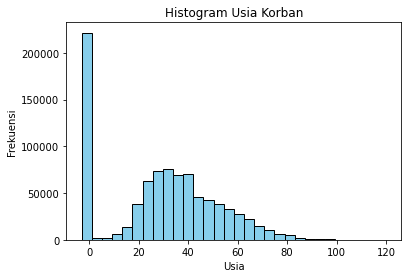

In [45]:
plt.hist(data_crime['UsiaKor'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram Usia Korban')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

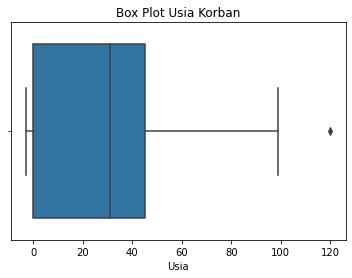

In [46]:
sns.boxplot(x=data_crime['UsiaKor'])
plt.title('Box Plot Usia Korban')
plt.xlabel('Usia')
plt.show()

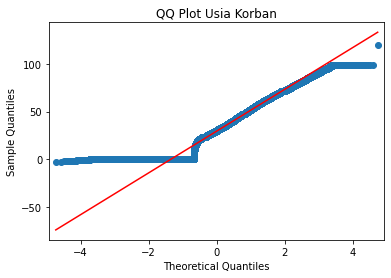

In [49]:
sm.qqplot(data_crime['UsiaKor'], line='s')
plt.title('QQ Plot Usia Korban')
plt.show()

In [50]:
data_crime['UsiaKor'].min()

-3